## Applying to Iris Dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [2]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data[:, 2:]

In [5]:
y = iris.target

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [8]:
clf = clf.fit(X, y)

### Export_graphviz

In [9]:
from sklearn.tree import export_graphviz

In [10]:
export_graphviz(clf,
                out_file="tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

# Run the following line on your command prompt
####  https://graphviz.gitlab.io/download/

`$ dot -Tpng tree.dot -o tree1.png`

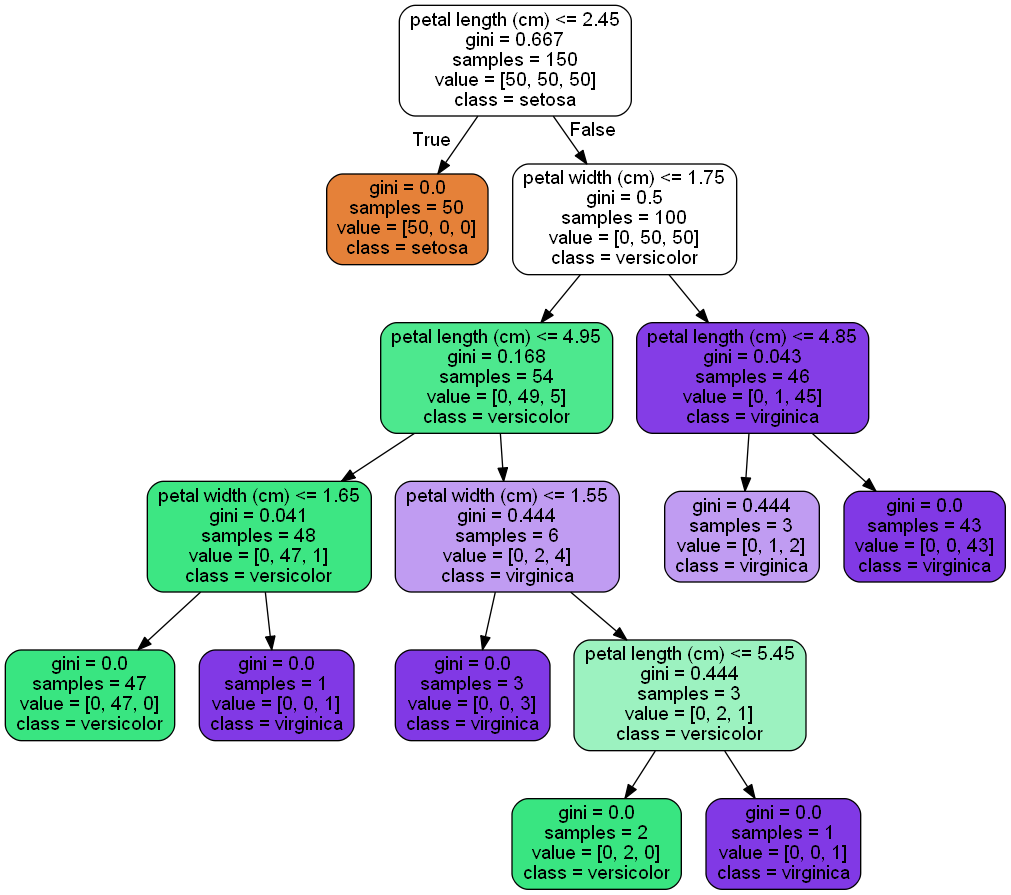

In [11]:
from IPython.display import Image
Image(filename=r"F:\DataScience_June2018\CourseMaterials\DecisionTrees\img\tree1.png", height=500, width=500)

## Graphviz

In [12]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)

In [14]:
graph = graphviz.Source(dot_data)

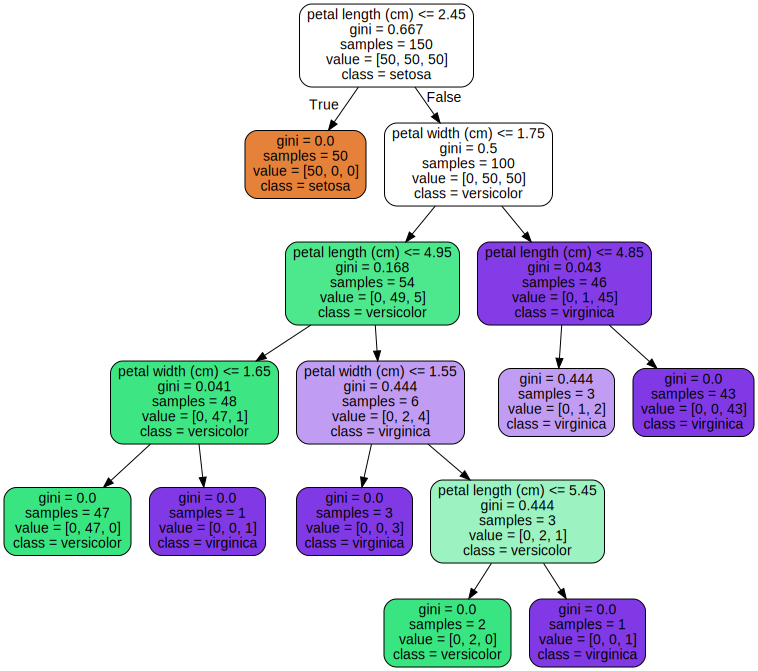

In [15]:
graph

## Visualise the Decision Boundary

In [16]:
import numpy as np
import pandas as pd

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [18]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [20]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [21]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [22]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

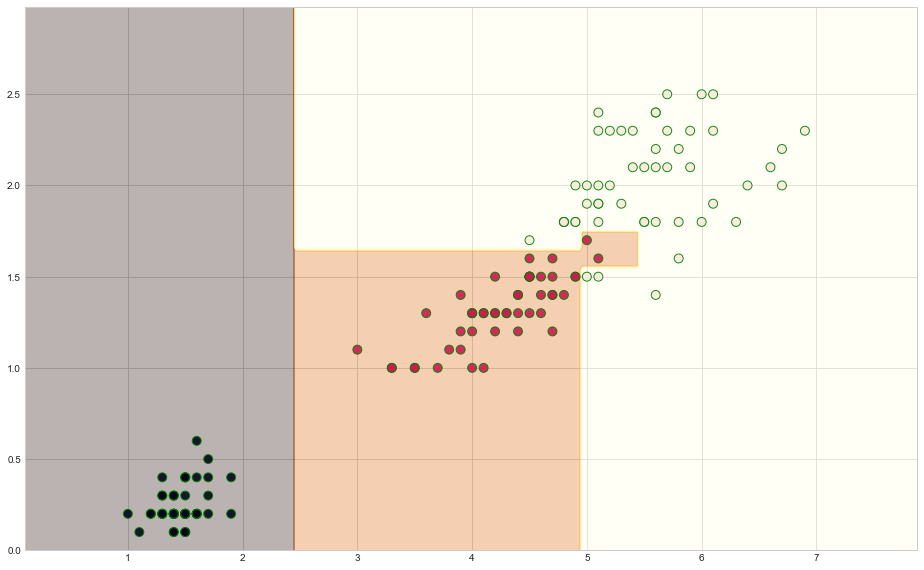

In [23]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');